<a href="https://colab.research.google.com/github/antiantono/bts-cda-tareas/blob/main/assignments/Session3_Regularization_PolyReg_Exercise_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 3: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

**Resources:**
* Auréliene Géron, Hands On ML with SKlearn, Keras and TF

# REGRESSION WITH REGULARIZATION

## Prepare Dataset

We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

This is the very same exercise that we did in class, try to go in depth into the tradeoffs of lambda (alpha) and others

### Import libraries + data

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Add noise

In [2]:
np.random.seed(8)

In [3]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.873429,0.968541,0.869195,0.530856,0.232728
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.011399,0.430469,0.402351,0.522675,0.478392
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.555356,0.543386,0.760896,0.712375,0.619682
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.426092,0.289075,0.973855,0.333774,0.218801
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.065808,0.982871,0.127856,0.322131,0.070943


In [ ]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## Default Hyperparameters 
* Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) 
* Describe how the scores of the features change

### Import & instantiate models

In [5]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# CREATE MODEL INSTANCES
linrg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elast = ElasticNet()

In [6]:
# MODEL COLLECTION
models = [(linrg, 'Linear Regression'),
          (lasso, 'Lasso'),
          (ridge, 'Ridge'),
          (elast, 'Elastic Net')]

### Normalize data
Use `StandardScaler` from Sklearn

In [7]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 18), (127, 18), (379,), (127,))

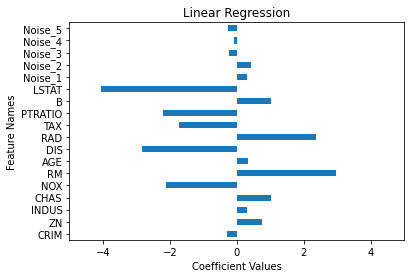

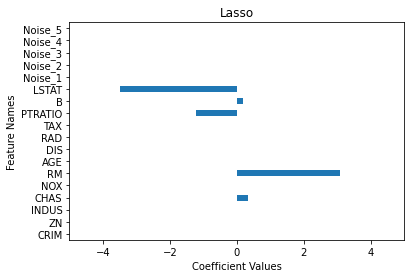

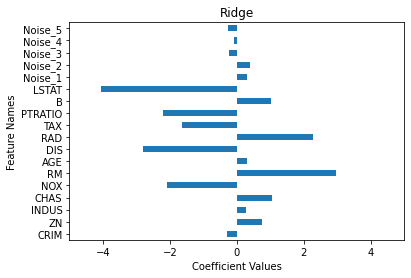

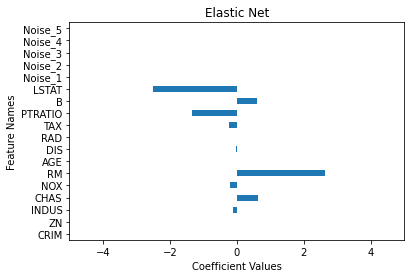

In [8]:
# FIT THE MODELS + VISUAL RESULTS
for model in models:
    model[0].fit(X_train, y_train)
    model_coefs = pd.Series(model[0].coef_, index=X.columns)
    model_coefs.plot(kind='barh')
    plt.xlim((-5,5))
    plt.xlabel('Coefficient Values')
    plt.ylabel('Feature Names')
    plt.title(model[1])
    plt.show()
    print("\n")

In [9]:
# MODEL COEFS IN DATAFRAME
df = pd.DataFrame()
df['Feature Name'] = X.columns

for model in models:
    column_name = model[1]
    df[column_name] = model[0].coef_

df

,Feature Name,Linear Regression,Lasso,Ridge,Elastic Net
0,CRIM,-0.298771,-0.000000,-0.288903,-0.000000
1,ZN,0.759257,0.000000,0.742092,0.000000
2,INDUS,0.288886,-0.000000,0.262506,-0.112192
3,CHAS,1.032671,0.340719,1.036135,0.635905
4,NOX,-2.118227,-0.000000,-2.076934,-0.202282
5,RM,2.956020,3.075163,2.969606,2.618869
6,AGE,0.325363,-0.000000,0.309942,-0.000000
7,DIS,-2.839544,-0.000000,-2.807758,-0.014043
8,RAD,2.362071,-0.000000,2.277344,-0.000000
9,TAX,-1.723557,-0.000000,-1.649841,-0.224970


### Decribe results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Evaluate model scores

In [15]:
# MODEL MSEs
from sklearn.metrics import mean_squared_error

for model in models:
    y_test_predict = model[0].predict(X_test)
    print("Mean Squared Error of {}: {:.2f}".format(model[1], mean_squared_error(y_test, y_test_predict)))

Mean Squared Error of Linear Regression: 24.01
Mean Squared Error of Lasso: 24.91
Mean Squared Error of Ridge: 24.00
Mean Squared Error of Elastic Net: 24.63


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

## Varying Regularization Levels
Fit models with different levels of regularization by varying the values of **alpha**, and describe how the parameters scores change

* Complete the function and apply it to the following values: [0, .0001, .5, 10]
* Describe the results

### Lasso

In [46]:
names = X.columns

def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    df = pd.DataFrame()
    df['Feature Name'] = names
    
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_scaled, y)
        column_name = 'alpha= %.4f' % alpha
        df[column_name] = lasso.coef_
        
    return df

In [47]:
lasso([0, .0001, .5, 10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5494.715375525261, tolerance: 4.2716295415019765
  positive)


,Feature Name,alpha= 0.0000,alpha= 0.0001,alpha= 0.5000,alpha= 10.0000
0,CRIM,-0.970956,-0.970650,-0.115265,-0.0
1,ZN,1.085205,1.084723,0.000000,0.0
2,INDUS,0.162550,0.161602,-0.000000,-0.0
3,CHAS,0.692123,0.692144,0.397079,0.0
4,NOX,-2.081694,-2.080838,-0.000000,-0.0
5,RM,2.642885,2.643068,2.974259,0.0
6,AGE,0.060165,0.059707,-0.000000,-0.0
7,DIS,-3.103699,-3.103321,-0.170569,0.0
8,RAD,2.662255,2.660414,-0.000000,-0.0
9,TAX,-2.098670,-2.096860,-0.000000,-0.0


#### **Result : Lasso**

**For Lasso Regression, the optimal alpha falls between .0001 and .5000. Up to $\alpha$= .0001, the lasso regression still fit weights for the noise features. At $\alpha$= .5, the noise (along with some other features) were reduced to zero weights. However, at $\alpha$= 10.0 the regularization became to strong and all features were deemed unimportant.**

In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [77]:
from sklearn.linear_model import LassoCV

# Opted for leave-one-out (cv=none), with standardized data as above (fit X_scaled without normalization)  
lasso_opt = LassoCV(cv = None, normalize=False).fit(X_scaled, y)
lasso_opt.alpha_

0.1565725898128637

In [102]:
lasso([0.1565725898128637])

,Feature Name,alpha= 0.1566
0,CRIM,-0.466706
1,ZN,0.499231
2,INDUS,-0.062378
3,CHAS,0.642980
4,NOX,-1.302050
5,RM,2.902950
6,AGE,-0.000000
7,DIS,-2.026116
8,RAD,0.363541
9,TAX,-0.156927


In [108]:
lasso([0.33])

,Feature Name,alpha= 0.3300
0,CRIM,-0.215009
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.517036
4,NOX,-0.581669
5,RM,2.999991
6,AGE,-0.000000
7,DIS,-0.892479
8,RAD,0.000000
9,TAX,-0.000000


#### **Result : LassoCV**

**Interestingly, the optimal alpha given by LassoCV isn't strong enough to eliminate all the noises -- in this case I'd go for a stronger regularization e.g. $\alpha$= .33 with some manual trial and error.**

### Ridge

In [49]:
names = X.columns

def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    df = pd.DataFrame()
    df['Feature Name'] = names

    for alpha in alphas:
        ridge = Ridge(alpha= alpha)
        ridge.fit(X_scaled, y)
        column_name = 'alpha= %.4f' % alpha
        df[column_name] = ridge.coef_
        
    return df

In [50]:
ridge([0, .0001, .5, 10])

,Feature Name,alpha= 0.0000,alpha= 0.0001,alpha= 0.5000,alpha= 10.0000
0,CRIM,-0.970956,-0.970955,-0.966527,-0.897682
1,ZN,1.085205,1.085204,1.077303,0.954201
2,INDUS,0.162550,0.162548,0.150443,-0.022181
3,CHAS,0.692123,0.692123,0.693779,0.716778
4,NOX,-2.081694,-2.081691,-2.067339,-1.831075
5,RM,2.642885,2.642886,2.647491,2.715980
6,AGE,0.060165,0.060164,0.056592,0.001772
7,DIS,-3.103699,-3.103696,-3.090005,-2.851653
8,RAD,2.662255,2.662248,2.626060,2.092719
9,TAX,-2.098670,-2.098663,-2.064802,-1.584472


In [73]:
from sklearn.linear_model import RidgeCV

# Opted for leave-one-out (cv=none), with standardized data as above (fit X_scaled without normalization)  
ridge_opt = RidgeCV(alphas=(.0001, .5, 1, 10.0), cv= None, normalize= False).fit(X_scaled, y)
ridge_opt.alpha_

1.0

#### **Result : Ridge**

**For Ridge Regression, the alpha values we tried did not make much difference on the result -- and it doesn't help us narrow down the feature selection. For this particular data, where there are a few features making an impact, Lasso is better as it helps us focus on these important features (by suppressing the less important ones).**

### ElasticNet

In [112]:
names = X.columns

def elasticnet(alphas, l1_ratio=.5):
    '''
    Takes in a list of alphas and l1_ratio (with default value = .5, or similar importance between l1 and l2) 
    Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    df = pd.DataFrame()
    df['Feature Name'] = names
    
    for alpha in alphas:
        elast = ElasticNet(alpha= alpha, l1_ratio= l1_ratio)

        # Fit the lasso regression
        elast.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'alpha= %.4f' % alpha

        # Create a column of coefficient values
        df[column_name] = elast.coef_
        
    # Return the dataframe  
    return df

In [110]:
elasticnet([0, .0001, .5, 10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5494.715375525261, tolerance: 4.2716295415019765
  positive)


,Feature Name,alpha= 0.0000,alpha= 0.0001,alpha= 0.5000,alpha= 10.0000
0,CRIM,-0.970956,-0.970577,-0.402214,-0.000000
1,ZN,1.085205,1.084561,0.239731,0.000000
2,INDUS,0.162550,0.161453,-0.267574,-0.000000
3,CHAS,0.692123,0.692219,0.575125,0.000000
4,NOX,-2.081694,-2.080534,-0.490773,-0.000000
5,RM,2.642885,2.643212,2.721574,0.203314
6,AGE,0.060165,0.059754,-0.000000,-0.000000
7,DIS,-3.103699,-3.102815,-0.712458,0.000000
8,RAD,2.662255,2.659478,0.000000,-0.000000
9,TAX,-2.098670,-2.096025,-0.235678,-0.000000


In [93]:
from sklearn.linear_model import ElasticNetCV

# Opted for leave-one-out (cv=none), with standardized data as above (fit X_scaled without normalization)  
elast_opt = ElasticNetCV(l1_ratio=[.01, .1, .25, .5, .75, .9, .99, 1], cv= None, normalize=False).fit(X_scaled, y)
print(elast_opt.alpha_)
print(elast_opt.l1_ratio_)

0.19303000683678914
0.1


In [111]:
elasticnet([0.19303000683678914], .1)

,Feature Name,alpha= 0.1930
0,CRIM,-0.660869
1,ZN,0.563284
2,INDUS,-0.365328
3,CHAS,0.729678
4,NOX,-0.952684
5,RM,2.787811
6,AGE,-0.127436
7,DIS,-1.696627
8,RAD,0.675857
9,TAX,-0.601441


In [130]:
elasticnet([0.5], .8)

,Feature Name,alpha= 0.5000
0,CRIM,-0.256338
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.474343
4,NOX,-0.330281
5,RM,2.907390
6,AGE,-0.000000
7,DIS,-0.376916
8,RAD,-0.000000
9,TAX,-0.097380


#### **Result : ElasticNet**

**ElasticNet takes into account l1 and l2 regularization, so in addition to optimizing alphas we can also try to optimize the l1/l2 ratio (ratio = 1 for l1 penalty, or ratio = 0 for l2 penalty.**

**Trying to find the best value with ElasticNetCV gives us $\alpha$=.1930 and l1_ratio= .1 (close to l2 penalty). However, these parameters don't help us "clean out" the noise we added.**

**Perhaps for this data I'll use a stronger $\alpha$=.5 with greater importance on l1 penalty (ratio= .8), to help remove the noise as well as some features that are less importance.**